In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import MeCab
import numpy as np
from gensim.models import word2vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# ファイル読み込み
file_num = 4   # ←この数値を変える
file_net = ("study_data/adjacent_matrix%s.csv" % file_num)
com_net = pd.read_csv(file_net, header=0, index_col=0, sep=',')
com_net

,1,2,3,4,5,6,7,8,9,10,...,124,125,126,127,128,129,130,131,132,133
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 発言情報ファイルの読み込み
file_info = ("study_data/com_info%s.csv" % file_num)
com_info = pd.read_csv(file_info, names=('発言者', '発言時刻', 'UNIX TIME', '発言内容'), index_col=0, sep=',', encoding='shift-jis')
com_info

,発言者,発言時刻,UNIX TIME,発言内容
1,池田夏子,2016/11/2 16:58,1478073480,（スタンプ）アメちゃんぺろぺろ
2,池田夏子,2016/11/2 17:26,1478075160,スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く
3,谷森 一貴,2016/11/2 17:39,1478075940,ーみんなの案まとめー
4,池田夏子,2016/11/2 17:43,1478076180,（画像）すしのイメージ画像
5,谷森 一貴,2016/11/2 17:44,1478076240,（ノート）ーみんなの案まとめー
6,まり,2016/11/2 17:45,1478076300,（画像）イメージ画像
7,たむこう,2016/11/10 19:08,1478772480,バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…
8,まり,2016/11/10 19:14,1478772840,私は時間遅くしても大丈夫！
9,池田夏子,2016/11/10 19:15,1478772900,遅くしても大丈夫です
10,藤間広也,2016/11/10 19:30,1478773800,大丈夫です


In [12]:
# エッジリストの作成
edges = []
for x in range(len(com_net)):
    for y in range(len(com_net.columns)):
        if(com_net.iloc[x, y] == 1):
            edges.append([x, y])
            
print(edges)

[[6, 7], [6, 8], [6, 9], [6, 10], [6, 13], [11, 12], [13, 14], [14, 15], [14, 16], [14, 17], [14, 18], [15, 16], [15, 17], [18, 19], [19, 21], [19, 23], [21, 22], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [27, 29], [27, 31], [27, 32], [27, 34], [27, 35], [27, 40], [28, 36], [29, 30], [37, 38], [38, 39], [39, 42], [40, 41], [43, 48], [45, 46], [48, 49], [49, 52], [58, 59], [58, 60], [58, 61], [62, 63], [62, 67], [63, 64], [64, 65], [65, 66], [67, 68], [68, 69], [69, 70], [69, 72], [70, 71], [72, 74], [74, 75], [74, 76], [76, 77], [80, 81], [82, 83], [84, 85], [84, 86], [84, 87], [85, 92], [87, 88], [88, 89], [88, 90], [88, 91], [92, 93], [93, 94], [94, 95], [94, 97], [95, 96], [96, 97], [97, 98], [98, 99], [99, 100], [101, 103], [102, 103], [103, 104], [104, 105], [105, 121], [106, 108], [108, 109], [109, 110], [110, 111], [110, 113], [111, 112], [111, 113], [113, 114], [113, 127], [113, 131], [114, 116], [115, 117], [116, 120], [117, 118], [118, 119], [119, 125], [121, 122], [1

In [13]:
# Word2Vec 文の類似度算出

# neologdを使ってモデル作成
m = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
m.parse('')
model = word2vec.Word2Vec.load("wikiextractor-master/wiki.model")

# 名詞、動詞、形容詞に限定
target_categories = ["名詞", "動詞",  "形容詞"]

# テキストのベクトルを計算
def get_vector(text):
    sum_vec = np.zeros(200)
    word_count = 0
    node = m.parseToNode(text)
    while node:
        fields = node.feature.split(",")
        if fields[0] in target_categories:
            sum_vec += model.wv[node.surface]
            word_count += 1
        node = node.next

    return sum_vec / word_count

# cos類似度を計算
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [14]:
# Word2Vec 発話と応答の類似度の抽出（定義した発話→応答文のみ）
for i in edges:
        enc, dec = i
        try:
            get_vector(com_info.iat[enc, 3])
            get_vector(com_info.iat[dec, 3])
        except Exception as e:
            print(com_info.iat[enc, 3] + "=>" + com_info.iat[dec, 3])
            print(e)
        else:
            print(com_info.iat[enc, 3] + "=>" + com_info.iat[dec, 3])
            v1 = get_vector(com_info.iat[enc, 3])
            v2 = get_vector(com_info.iat[dec, 3])
            print(cos_sim(v1, v2))

バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>私は時間遅くしても大丈夫！
0.807642504942
バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>遅くしても大丈夫です
0.672129484212
バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>大丈夫です
0.419315175594
バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>今終わって僕も遅くでも大丈夫なので皆そろってから始めましょうか
0.566860383105
バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>申し訳ないですそろそろいけます
0.290401993335
うち、回線が遅くて、頻繁に映像が滞るんだけど、音声だけでやっていい？=>どちらでもいいと思う
0.484849757197
申し訳ないですそろそろいけます=>みなさんどうでしょう
0.416081154621
みなさんどうでしょう=>始めますか
-0.0326275273149
みなさんどうでしょう=>おけー
0.366776934451
みなさんどうでしょう=>はい、オッケー
0.424223951119
みなさんどうでしょう=>50分まで藤間君のデザインについて話し合い11時までどれを採用するかを決めようと思いますって感じでタイムキープしていきます
0.269099019781
始めますか=>おけー
-0.030636872224
始めますか=>はい、オッケー
-0.0578813636072
50分まで藤間君のデザインについて話し合い11時までどれを採用するかを決めようと思いますって感じでタイムキープしていきます=>とりあえずやりますか
0.488045315722
とりあえずやりますか=>既読３だけど大丈夫？谷森かな？
"word '谷森' not in vocabulary"
とりあえずやりますか=>lineのグループラインでやるんだっけ？
0.347889315726
既読３だけど大丈夫？谷森かな？=>あぁ、大丈夫だね
"word '谷森' not in vocabulary"
lineのグループラインでやるん

/Users/kazuki_tanimori/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [15]:
# Word2Vec 発話と応答の類似度の抽出（全発話総当たり）
for x in range(len(com_net)):
    for y in range(len(com_net.columns)):
        if x!=y and x < y:
            try:
                get_vector(com_info.iat[x, 3])
                get_vector(com_info.iat[y, 3])
            except Exception as e:
                print(com_info.iat[x, 3] + "=>" + com_info.iat[y, 3])
                print(e)
            else:
                print(com_info.iat[x, 3] + "=>" + com_info.iat[y, 3])
                v1 = get_vector(com_info.iat[x, 3])
                v2 = get_vector(com_info.iat[y, 3])
                print(cos_sim(v1, v2))

（スタンプ）アメちゃんぺろぺろ=>スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く
"word 'モバイルバッテリー' not in vocabulary"
（スタンプ）アメちゃんぺろぺろ=>ーみんなの案まとめー
0.377717717828
（スタンプ）アメちゃんぺろぺろ=>（画像）すしのイメージ画像
0.205573517329
（スタンプ）アメちゃんぺろぺろ=>（ノート）ーみんなの案まとめー
0.410878360165
（スタンプ）アメちゃんぺろぺろ=>（画像）イメージ画像
0.155344303691
（スタンプ）アメちゃんぺろぺろ=>バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…
0.0950102022508
（スタンプ）アメちゃんぺろぺろ=>私は時間遅くしても大丈夫！
-0.0061211260744
（スタンプ）アメちゃんぺろぺろ=>遅くしても大丈夫です
-0.0625536946853
（スタンプ）アメちゃんぺろぺろ=>大丈夫です
0.196050325574
（スタンプ）アメちゃんぺろぺろ=>今終わって僕も遅くでも大丈夫なので皆そろってから始めましょうか
0.0995903453886
（スタンプ）アメちゃんぺろぺろ=>うち、回線が遅くて、頻繁に映像が滞るんだけど、音声だけでやっていい？
0.237704143783
（スタンプ）アメちゃんぺろぺろ=>どちらでもいいと思う
0.132370019323
（スタンプ）アメちゃんぺろぺろ=>申し訳ないですそろそろいけます
0.186865147554
（スタンプ）アメちゃんぺろぺろ=>みなさんどうでしょう
0.385596814932
（スタンプ）アメちゃんぺろぺろ=>始めますか
-0.0678234231022
（スタンプ）アメちゃんぺろぺろ=>おけー
0.336052393601
（スタンプ）アメちゃんぺろぺろ=>はい、オッケー
0.294156509426
（スタンプ）アメちゃんぺろぺろ=>50分まで藤間君のデザインについて話し合い11時までどれを採用するかを決めようと思いますって感じでタイムキープしていきます
0.0860244491498
（スタンプ）アメちゃんぺろぺろ=>とりあえずやりますか
0.157814

/Users/kazuki_tanimori/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide



"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>いやアカウント知らんけど
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>ーSkypeIDー
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>SkypeIDってどれだろう？
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>（画像）Skypeの画面
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>ーSkypeIDー
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>ごめんもうちょい待って
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>これってどこから検索するの？
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>田村くんグループ作ってくれ
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>作った
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くとき、スマホの方が面積が大きくてもスマホを上に置く=>入れた？
"word 'モバイルバッテリー' not in vocabulary"
スマホとモバイルバッテリーを重ねて置くと

0.397878719822
（ノート）ーみんなの案まとめー=>ok
0.0489075718571
（ノート）ーみんなの案まとめー=>お願いします
0.215343477809
（ノート）ーみんなの案まとめー=>実演といっても見せたり乗せたりするだけなので
0.106572848518
（ノート）ーみんなの案まとめー=>（ファイル）発表用スライド３
0.287048023984
（画像）イメージ画像=>バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…
0.188060674237
（画像）イメージ画像=>私は時間遅くしても大丈夫！
0.10839336322
（画像）イメージ画像=>遅くしても大丈夫です
-0.00701097038406
（画像）イメージ画像=>大丈夫です
0.0436954783242
（画像）イメージ画像=>今終わって僕も遅くでも大丈夫なので皆そろってから始めましょうか
-0.0369004081577
（画像）イメージ画像=>うち、回線が遅くて、頻繁に映像が滞るんだけど、音声だけでやっていい？
0.330112856887
（画像）イメージ画像=>どちらでもいいと思う
0.0868398536214
（画像）イメージ画像=>申し訳ないですそろそろいけます
0.0053507017886
（画像）イメージ画像=>みなさんどうでしょう
0.0892903132341
（画像）イメージ画像=>始めますか
-0.0293727661646
（画像）イメージ画像=>おけー
0.000919822734039
（画像）イメージ画像=>はい、オッケー
0.0890766891999
（画像）イメージ画像=>50分まで藤間君のデザインについて話し合い11時までどれを採用するかを決めようと思いますって感じでタイムキープしていきます
0.267963347073
（画像）イメージ画像=>とりあえずやりますか
0.0468917428219
（画像）イメージ画像=>（スタンプ）時が来た
0.0939106005296
（画像）イメージ画像=>既読３だけど大丈夫？谷森かな？
"word '谷森' not in vocabulary"
（画像）イメージ画像=>あぁ、大丈夫だね
0.0436954783242
（画像）イメージ画像

0.00805633451453
遅くしても大丈夫です=>俺の前で誰か実演やる役やってくれ
0.400903637988
遅くしても大丈夫です=>できれば残りの2人のどっちかにやってほしいんだけど…
0.388290320305
遅くしても大丈夫です=>ok
0.0338686758094
遅くしても大丈夫です=>お願いします
0.708907460405
遅くしても大丈夫です=>実演といっても見せたり乗せたりするだけなので
0.556419491872
遅くしても大丈夫です=>（ファイル）発表用スライド３
0.00239290140323
大丈夫です=>今終わって僕も遅くでも大丈夫なので皆そろってから始めましょうか
0.596536534791
大丈夫です=>うち、回線が遅くて、頻繁に映像が滞るんだけど、音声だけでやっていい？
0.531215273605
大丈夫です=>どちらでもいいと思う
0.611039924992
大丈夫です=>申し訳ないですそろそろいけます
0.395855320885
大丈夫です=>みなさんどうでしょう
0.511238687036
大丈夫です=>始めますか
0.0795852437909
大丈夫です=>おけー
0.357903124729
大丈夫です=>はい、オッケー
0.331343338609
大丈夫です=>50分まで藤間君のデザインについて話し合い11時までどれを採用するかを決めようと思いますって感じでタイムキープしていきます
0.394200417629
大丈夫です=>とりあえずやりますか
0.390928968646
大丈夫です=>（スタンプ）時が来た
0.3278029938
大丈夫です=>既読３だけど大丈夫？谷森かな？
"word '谷森' not in vocabulary"
大丈夫です=>あぁ、大丈夫だね
1.0
大丈夫です=>lineのグループラインでやるんだっけ？
0.445275376992
大丈夫です=>その方が良い？
0.339864986057
大丈夫です=>スカイプのほうが画面共有できていいんじゃね
0.380593664108
大丈夫です=>画面共有するならskypeの方がいい
"word 'skype' not in vocabulary"
大丈夫です=>じゃあSkypeIDを
"word 'Sky

"word 'rysksw' not in vocabulary"
申し訳ないですそろそろいけます=>谷森俺のことを招待できたりする？
"word '谷森' not in vocabulary"
申し訳ないですそろそろいけます=>いやアカウント知らんけど
"word '知らんけど' not in vocabulary"
申し訳ないですそろそろいけます=>ーSkypeIDー
0.136077477009
申し訳ないですそろそろいけます=>SkypeIDってどれだろう？
"word 'SkypeID' not in vocabulary"
申し訳ないですそろそろいけます=>（画像）Skypeの画面
-0.00743056192932
申し訳ないですそろそろいけます=>ーSkypeIDー
0.136077477009
申し訳ないですそろそろいけます=>ごめんもうちょい待って
0.118010796054
申し訳ないですそろそろいけます=>これってどこから検索するの？
0.107222136891
申し訳ないですそろそろいけます=>田村くんグループ作ってくれ
0.461830616778
申し訳ないですそろそろいけます=>作った
0.169012717523
申し訳ないですそろそろいけます=>入れた？
0.193684968611
申し訳ないですそろそろいけます=>ーSkypeIDー
0.136077477009
申し訳ないですそろそろいけます=>遅くなりました
0.060064944981
申し訳ないですそろそろいけます=>サンクス
0.0805746894228
申し訳ないですそろそろいけます=>紙粘土見つけた人が買う
0.241754912765
申し訳ないですそろそろいけます=>昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？
0.422934432804
申し訳ないですそろそろいけます=>（画像）充電のイラスト
-0.021499299257
申し訳ないですそろそろいけます=>ごめんこれは間違えた。
0.234901525368
申し訳ないですそろそろいけます=>（スタン

はい、オッケー=>まだ誰も買ってないよね？明日100均行く用事できたから僕買って来ますよ
"word '100均' not in vocabulary"
はい、オッケー=>お願いします…
0.083685670207
はい、オッケー=>（スタンプ）手をあげてるポーズ
0.357792332442
はい、オッケー=>（画像）紙粘土の画像
0.0344425493333
はい、オッケー=>色付きのあったんで白と赤買いました
0.00300973462618
はい、オッケー=>（スタンプ）すまん
0.115688867615
はい、オッケー=>（スタンプ）さんきゅーでーす
"word 'さんきゅー' not in vocabulary"
はい、オッケー=>（スタンプ）ありがとさん
0.340855619338
はい、オッケー=>（スタンプ）It s so good
0.286731234181
はい、オッケー=>遅刻します
-0.022347321167
はい、オッケー=>大変申し訳ないんですけど今日5限からでもいいですかね
0.319223697034
はい、オッケー=>大丈夫だけど分担とか決めることと集まった時にやること全部終わるかな？
0.117545803218
はい、オッケー=>俺も5限からになりそうです
0.234406821974
はい、オッケー=>ちょっと遅れます
-0.151779847147
はい、オッケー=>今日ってどこでやるんですか？
0.290249681764
はい、オッケー=>全く決めてないです
0.0968736022326
はい、オッケー=>どこかの研究室かラウンジですよね、するとしたら
-0.0271843825186
はい、オッケー=>7階か9階あたり？
0.0238102583773
はい、オッケー=>か6階
-0.00568164758123
はい、オッケー=>福地研たぶんうるさくしなければできる
0.0247024228974
はい、オッケー=>じゃふくちけんでやる？
"word 'ゃふくちけんでやる' not in vocabulary"
はい、オッケー=>他にできそうな研究室ない？
"word '室ない' not in vocabulary"
はい、オッケー=>わたなべけんはせまい
0.170277879837
はい、オッケ

"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>結局実演ってするんだっけ？
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>読むのはやってもいいけど
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>実演ていうか見せるぐらい？乗せるとか
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>ふむふむでもほとんどこのスライドで3分だよね
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>あとチーム名なんだっけ
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>かなりギリギリだと思う
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>ゴメン、それ書いてなかったか
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>INT型かな？
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>LINE名だったw
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>ギリギリか…
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>BGMどうする？スライドショー開始すると流れ始めちゃうからなくしてもいいけど
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>あってもいいと思う
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>たぶん
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>じゃあスライドショー開始のタイミング気をつけて
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>一応チーム名入れたのあげとくね
"word '谷森' not in vocabulary"
既読３だけど大丈夫？谷森かな？=>（URL）発表用スライド２
"word '谷

"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>全く決めてないです
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>どこかの研究室かラウンジですよね、するとしたら
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>7階か9階あたり？
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>か6階
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>福地研たぶんうるさくしなければできる
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>じゃふくちけんでやる？
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>他にできそうな研究室ない？
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>わたなべけんはせまい
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>と思う
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>うちは人がいなければって感じだけど金曜結構人いるから
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>誰か映像画像処理撮ってる人いない？
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>で、どこでやる？
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>もう5限だけど
"word 'rysksw' not in vocabulary"
「rysksw」で検索すると出てくると思う=>斉藤研に今2人います
"word 'rysksw' not in

0.582495246876
（画像）Skypeの画面=>任せても大丈夫ですか？
-0.0102458188423
（画像）Skypeの画面=>明日話す人は二人以外？
0.101247319858
（画像）Skypeの画面=>それでもいいと思う、1人でもいいと思うし
0.0281201805234
（画像）Skypeの画面=>結局実演ってするんだっけ？
0.111444549029
（画像）Skypeの画面=>読むのはやってもいいけど
0.111264576182
（画像）Skypeの画面=>実演ていうか見せるぐらい？乗せるとか
0.186049612629
（画像）Skypeの画面=>ふむふむでもほとんどこのスライドで3分だよね
0.389451392301
（画像）Skypeの画面=>あとチーム名なんだっけ
0.00551469651919
（画像）Skypeの画面=>かなりギリギリだと思う
0.0296636750275
（画像）Skypeの画面=>ゴメン、それ書いてなかったか
0.198952841248
（画像）Skypeの画面=>INT型かな？
0.225943372581
（画像）Skypeの画面=>LINE名だったw
0.200632288294
（画像）Skypeの画面=>ギリギリか…
0.0795661100228
（画像）Skypeの画面=>BGMどうする？スライドショー開始すると流れ始めちゃうからなくしてもいいけど
0.287684255152
（画像）Skypeの画面=>あってもいいと思う
-0.0679976453011
（画像）Skypeの画面=>たぶん
nan
（画像）Skypeの画面=>じゃあスライドショー開始のタイミング気をつけて
0.295763049053
（画像）Skypeの画面=>一応チーム名入れたのあげとくね
0.0113045736044
（画像）Skypeの画面=>（URL）発表用スライド２
0.456501527533
（画像）Skypeの画面=>俺の前で誰か実演やる役やってくれ
0.0404219111127
（画像）Skypeの画面=>できれば残りの2人のどっちかにやってほしいんだけど…
0.072635869899
（画像）Skypeの画面=>ok
0.0840320494856
（画像）Skypeの画面=>

0.331400472058
作った=>実演といっても見せたり乗せたりするだけなので
0.421086519412
作った=>（ファイル）発表用スライド３
0.105400503106
入れた？=>ーSkypeIDー
0.0166408644073
入れた？=>遅くなりました
0.107079067838
入れた？=>サンクス
0.0110549713648
入れた？=>紙粘土見つけた人が買う
0.420251450645
入れた？=>昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？
0.389089253038
入れた？=>（画像）充電のイラスト
0.0853923052532
入れた？=>ごめんこれは間違えた。
0.29669152786
入れた？=>（スタンプ）OK
0.0907501839728
入れた？=>まだ誰も買ってないよね？明日100均行く用事できたから僕買って来ますよ
"word '100均' not in vocabulary"
入れた？=>お願いします…
0.340903175489
入れた？=>（スタンプ）手をあげてるポーズ
0.328001547104
入れた？=>（画像）紙粘土の画像
0.013449001279
入れた？=>色付きのあったんで白と赤買いました
0.307996048157
入れた？=>（スタンプ）すまん
0.111767393138
入れた？=>（スタンプ）さんきゅーでーす
"word 'さんきゅー' not in vocabulary"
入れた？=>（スタンプ）ありがとさん
0.0690099813214
入れた？=>（スタンプ）It s so good
0.0119983264578
入れた？=>遅刻します
0.269294391604
入れた？=>大変申し訳ないんですけど今日5限からでもいいですかね
0.105202790786
入れた？=>大丈夫だけど分担とか決めることと集まった時にやること全部終わるかな？
0.299677322702
入れた？=>俺も5限からになりそうです
0.175101576116
入れた？=>ち

昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？=>実演ていうか見せるぐらい？乗せるとか
0.309142448459
昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？=>ふむふむでもほとんどこのスライドで3分だよね
0.188746925477
昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？=>あとチーム名なんだっけ
0.337330571533
昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？=>かなりギリギリだと思う
0.614119775248
昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？=>ゴメン、それ書いてなかったか
0.560743687455
昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の写真でやっていくとして、寿司以外にも案を各自で考えておいた方がいいと思うんだけどどう思う？=>INT型かな？
0.130181459827
昨日の話し合いで言い忘れてたんだけど、来週、寿司でやってみて微妙だった（iphoneの大きさ的に無理があるなど）場合に備えて、テーマはこのスマホと充電器の

色付きのあったんで白と赤買いました=>一応チーム名入れたのあげとくね
0.225318172536
色付きのあったんで白と赤買いました=>（URL）発表用スライド２
0.124806879202
色付きのあったんで白と赤買いました=>俺の前で誰か実演やる役やってくれ
0.180938928606
色付きのあったんで白と赤買いました=>できれば残りの2人のどっちかにやってほしいんだけど…
0.152950043194
色付きのあったんで白と赤買いました=>ok
0.0409672706464
色付きのあったんで白と赤買いました=>お願いします
0.203740593666
色付きのあったんで白と赤買いました=>実演といっても見せたり乗せたりするだけなので
0.274809122649
色付きのあったんで白と赤買いました=>（ファイル）発表用スライド３
0.147916088582
（スタンプ）すまん=>（スタンプ）さんきゅーでーす
"word 'さんきゅー' not in vocabulary"
（スタンプ）すまん=>（スタンプ）ありがとさん
0.682389723698
（スタンプ）すまん=>（スタンプ）It s so good
0.357727996172
（スタンプ）すまん=>遅刻します
-0.059192282146
（スタンプ）すまん=>大変申し訳ないんですけど今日5限からでもいいですかね
0.048886707439
（スタンプ）すまん=>大丈夫だけど分担とか決めることと集まった時にやること全部終わるかな？
0.0992917350743
（スタンプ）すまん=>俺も5限からになりそうです
-0.0182045769579
（スタンプ）すまん=>ちょっと遅れます
-0.123989323489
（スタンプ）すまん=>今日ってどこでやるんですか？
0.0934520664329
（スタンプ）すまん=>全く決めてないです
0.0201097670378
（スタンプ）すまん=>どこかの研究室かラウンジですよね、するとしたら
0.0611983267945
（スタンプ）すまん=>7階か9階あたり？
0.00466631983065
（スタンプ）すまん=>か6階
0.0621533034988
（スタンプ）すまん=>福地研たぶんうるさくしなければできる
-0.0162

"word 'ゃふくちけんでやる' not in vocabulary"
俺も5限からになりそうです=>他にできそうな研究室ない？
"word '室ない' not in vocabulary"
俺も5限からになりそうです=>わたなべけんはせまい
0.0990217948394
俺も5限からになりそうです=>と思う
0.656982186164
俺も5限からになりそうです=>うちは人がいなければって感じだけど金曜結構人いるから
0.381554800824
俺も5限からになりそうです=>誰か映像画像処理撮ってる人いない？
0.373716766362
俺も5限からになりそうです=>で、どこでやる？
0.568654946341
俺も5限からになりそうです=>もう5限だけど
-0.056623954614
俺も5限からになりそうです=>斉藤研に今2人います
0.280668770294
俺も5限からになりそうです=>はい、今行く
0.44723697283
俺も5限からになりそうです=>（URL）iPhoneの発表プレゼン
0.00127909126215
俺も5限からになりそうです=>池田さん無意識の行為の写真送ってくれないですか
0.412962033525
俺も5限からになりそうです=>（画像）無意識の行為の写真
0.0908493809902
俺も5限からになりそうです=>ありがとうございます
nan
俺も5限からになりそうです=>（ファイル）発表スライド
0.0256514710941
俺も5限からになりそうです=>とりあえずできたスライド資料送ります
0.10635915821
俺も5限からになりそうです=>明日の3限空いてる人いる？
"word '3限' not in vocabulary"
俺も5限からになりそうです=>デモビデオの撮影しなきゃいけないんだけど
0.370550580794
俺も5限からになりそうです=>僕はゼミなので出れないです
0.371212076176
俺も5限からになりそうです=>間違えた
0.312182165788
俺も5限からになりそうです=>2限か6限
"word '2限' not in vocabulary"
俺も5限からになりそうです=>どっちもいけない
0.452453864792
俺も5限からになりそうです=>い

じゃふくちけんでやる？=>どっちもいけない
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>いけないです
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>ごめん私も無理そう
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>素材が無いとデモビデオ作れない
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>どうしようか
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>と言われても集まれないものは集まれないしな動画はなしにするしかないのでは
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>プレゼンだけで3分できる？
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>プレゼン資料見ました？導入の無意識の行為のところしか書いてないんですよ
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>でも動画なしってことはプレゼン3分やるってことだよね
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>まあそうなるね
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>じゃあ池田さんこの前の無意識の行為からデザインにするのスライドとデザインのイメージここに投げといてくれない？
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>はい
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>（ファイル）スライド
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>（画像）寿司型スマホケースのイラスト
"word 'ゃふくちけんでやる' not in vocabulary"
じゃふくちけんでやる？=>どうも
"word 'ゃふくちけんでやる' not in

nan
池田さん無意識の行為の写真送ってくれないですか=>（ファイル）スライド
0.139205136643
池田さん無意識の行為の写真送ってくれないですか=>（画像）寿司型スマホケースのイラスト
"word 'スマホケース' not in vocabulary"
池田さん無意識の行為の写真送ってくれないですか=>どうも
nan
池田さん無意識の行為の写真送ってくれないですか=>とりあえずプレゼン資料は作りました
0.242000805153
池田さん無意識の行為の写真送ってくれないですか=>改良するところとかあったら色々改良してください。BGMとかもいらないと判断したら外してください。原稿とかも考えたけどたぶん3分ギリギリです。
0.379317752863
池田さん無意識の行為の写真送ってくれないですか=>僕と藤間はスライド作ったから発表はお願いしてもいいかな？
0.548618338645
池田さん無意識の行為の写真送ってくれないですか=>（URL）発表スライドのファイルURL
0.118868423913
池田さん無意識の行為の写真送ってくれないですか=>任せても大丈夫ですか？
0.416062756481
池田さん無意識の行為の写真送ってくれないですか=>明日話す人は二人以外？
0.499449683389
池田さん無意識の行為の写真送ってくれないですか=>それでもいいと思う、1人でもいいと思うし
0.529649835667
池田さん無意識の行為の写真送ってくれないですか=>結局実演ってするんだっけ？
0.346695996261
池田さん無意識の行為の写真送ってくれないですか=>読むのはやってもいいけど
0.595967259363
池田さん無意識の行為の写真送ってくれないですか=>実演ていうか見せるぐらい？乗せるとか
0.264826312047
池田さん無意識の行為の写真送ってくれないですか=>ふむふむでもほとんどこのスライドで3分だよね
0.0461130283727
池田さん無意識の行為の写真送ってくれないですか=>あとチーム名なんだっけ
0.227844509848
池田さん無意識の行為の写真送ってくれないですか=>かなりギリギリだと思う
0.405390926894
池田さん無意識の行為の写真送ってくれないですか=>ゴメン、それ書いてなかっ

いけないです=>どうしようか
0.314319951457
いけないです=>と言われても集まれないものは集まれないしな動画はなしにするしかないのでは
0.0436019762307
いけないです=>プレゼンだけで3分できる？
0.0226583965468
いけないです=>プレゼン資料見ました？導入の無意識の行為のところしか書いてないんですよ
0.152193102013
いけないです=>でも動画なしってことはプレゼン3分やるってことだよね
0.251946018321
いけないです=>まあそうなるね
0.0255932010244
いけないです=>じゃあ池田さんこの前の無意識の行為からデザインにするのスライドとデザインのイメージここに投げといてくれない？
0.27416372187
いけないです=>はい
nan
いけないです=>（ファイル）スライド
0.017930400928
いけないです=>（画像）寿司型スマホケースのイラスト
"word 'スマホケース' not in vocabulary"
いけないです=>どうも
nan
いけないです=>とりあえずプレゼン資料は作りました
-0.0134208899661
いけないです=>改良するところとかあったら色々改良してください。BGMとかもいらないと判断したら外してください。原稿とかも考えたけどたぶん3分ギリギリです。
0.252201151482
いけないです=>僕と藤間はスライド作ったから発表はお願いしてもいいかな？
0.265667733108
いけないです=>（URL）発表スライドのファイルURL
-0.0364084207788
いけないです=>任せても大丈夫ですか？
0.185530772398
いけないです=>明日話す人は二人以外？
0.218235937024
いけないです=>それでもいいと思う、1人でもいいと思うし
0.322768890889
いけないです=>結局実演ってするんだっけ？
0.198329709537
いけないです=>読むのはやってもいいけど
0.321647624933
いけないです=>実演ていうか見せるぐらい？乗せるとか
0.0212461845601
いけないです=>ふむふむでもほとんどこのスライドで3分だよね
-0.0138560291242
いけないです=>あとチーム名な

どうも=>実演といっても見せたり乗せたりするだけなので
nan
どうも=>（ファイル）発表用スライド３
nan
とりあえずプレゼン資料は作りました=>改良するところとかあったら色々改良してください。BGMとかもいらないと判断したら外してください。原稿とかも考えたけどたぶん3分ギリギリです。
0.177696290986
とりあえずプレゼン資料は作りました=>僕と藤間はスライド作ったから発表はお願いしてもいいかな？
0.15085769182
とりあえずプレゼン資料は作りました=>（URL）発表スライドのファイルURL
0.327597709051
とりあえずプレゼン資料は作りました=>任せても大丈夫ですか？
0.0179292038972
とりあえずプレゼン資料は作りました=>明日話す人は二人以外？
0.0704225108759
とりあえずプレゼン資料は作りました=>それでもいいと思う、1人でもいいと思うし
0.0282802653425
とりあえずプレゼン資料は作りました=>結局実演ってするんだっけ？
0.0495064638585
とりあえずプレゼン資料は作りました=>読むのはやってもいいけど
0.136952692933
とりあえずプレゼン資料は作りました=>実演ていうか見せるぐらい？乗せるとか
0.0125248052351
とりあえずプレゼン資料は作りました=>ふむふむでもほとんどこのスライドで3分だよね
0.103845866851
とりあえずプレゼン資料は作りました=>あとチーム名なんだっけ
-0.0506191678079
とりあえずプレゼン資料は作りました=>かなりギリギリだと思う
0.0236994598776
とりあえずプレゼン資料は作りました=>ゴメン、それ書いてなかったか
0.184303226075
とりあえずプレゼン資料は作りました=>INT型かな？
-0.041441692218
とりあえずプレゼン資料は作りました=>LINE名だったw
0.141580507904
とりあえずプレゼン資料は作りました=>ギリギリか…
-0.0268143065054
とりあえずプレゼン資料は作りました=>BGMどうする？スライドショー開始すると流れ始めちゃうからなくしてもいいけど
0.0289271554514
とりあえずプレゼン資料は作りました=

In [16]:
# TFIDF算出

# 指定したカテゴリの単語のみを取得
def get_words(text):
    # 辞書の指定
    m = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
    words = []
    # ターゲットの指定
    target_categories = ["名詞", "動詞",  "形容詞", "副詞", "連体詞", "感動詞"]
    # 省きたい単語
    target_words = ["ー"]
    # 分かち書き
    node = m.parseToNode(text)
    while node:
        fields = node.feature.split(",")
        # "ー"を単語から省く
        if not node.surface in target_words:
            # 指定したカテゴリの単語をリストに追加
            if fields[0] in target_categories:
                words.append(node.surface)
        node = node.next

    words_str = map(str, words)
    return ",".join(words_str)

In [17]:
# 配列に変換
text_num = []
doc = []
head = ["（スタンプ）", "（画像）", "（ノート）", "（URL）", "（ファイル）"]

for i in range(len(com_info)):
    # （）で始まる文章の削除
    flag = True
    for j in head:
        if j in com_info.iat[i, 3]:
            flag = False
    
    if flag:
        text_num.append(i)
        doc.append(get_words(com_info.iat[i, 3]))

        
docs = np.array(doc)

# TFIDFで文章をベクトル化
np.set_printoptions(precision=2)
vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')
vecs = vectorizer.fit_transform(docs)
 
for k,v in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1]):
    print(k,v)
    
print(vecs.toarray())

100均 0
10時 1
11時 2
1人 3
2人 4
2限 5
3分 6
3限 7
50分 8
5限 9
6限 10
6階 11
7階 12
9階 13
bgm 14
id 15
int 16
iphone 17
line 18
ok 19
rysksw 20
skype 21
skypeid 22
w 23
あぁ 24
あげ 25
あたり 26
あっ 27
あと 28
ありがとう 29
ある 30
い 31
いい 32
いき 33
いく 34
いけ 35
いって 36
いない 37
いら 38
いる 39
うち 40
うるさく 41
おい 42
おけ 43
お願い 44
かな 45
かなり 46
ください 47
くる 48
くれ 49
くん 50
けん 51
ここ 52
こと 53
この 54
これ 55
ごめん 56
さ 57
さん 58
し 59
しよう 60
する 61
せまい 62
そう 63
その 64
それ 65
そろそろ 66
そろっ 67
たぶん 68
ちゃう 69
ちょっと 70
つけ 71
て 72
てる 73
でき 74
できる 75
できれ 76
とい 77
とき 78
とく 79
ところ 80
とりあえず 81
どう 82
どうでしょう 83
どうも 84
どこ 85
どこか 86
どちら 87
どっち 88
どれ 89
ない 90
なくし 91
なし 92
なべ 93
なり 94
なる 95
の 96
はい 97
ふむふむ 98
ほう 99
ほしい 100
ほとんど 101
まあ 102
まだ 103
まとめ 104
み 105
みなさん 106
みんな 107
もう 108
もうちょい 109
もの 110
もらい 111
ゃふくちけんでやる 112
やっ 113
やり 114
やる 115
れ 116
ん 117
アカウント 118
イメージ 119
オッケー 120
キープ 121
ギリギリ 122
グループ 123
ゴメン 124
サンクス 125
スカイプ 126
スマ 127
スマホ 128
スライド 129
スライドショー 130
ゼミ 131
タイミング 132
タイム 133
チーム名 134
テーマ 135
デザイン 136
デモ 137
バイト 138
ビデオ 139
プレゼン 140
ホ 141
モバイルバッ

In [18]:
# TFIDFでベクトル化された文章の類似度を計算

# 類似度の閾値設定
threshold = 0.15

for x in range(len(docs)):
    for y in range(len(docs)):
        if x != y and x < y:
            if not com_info.iat[text_num[x], 3] == com_info.iat[text_num[y], 3]:
                if cos_sim(vecs.toarray()[x], vecs.toarray()[y]) > threshold:
                    print(str(text_num[x]) +  "：" + com_info.iat[text_num[x], 3] + "=>" + str(text_num[y]) + "：" + com_info.iat[text_num[y], 3] )
                    print(cos_sim(vecs.toarray()[x], vecs.toarray()[y]))

6：バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>7：私は時間遅くしても大丈夫！
0.258283940448
6：バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>8：遅くしても大丈夫です
0.151543767131
6：バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>10：今終わって僕も遅くでも大丈夫なので皆そろってから始めましょうか
0.160776036277
6：バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>13：申し訳ないですそろそろいけます
0.155941361115
6：バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>15：始めますか
0.266451371392
6：バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>41：遅くなりました
0.154730916719
6：バイトが長引きそうなので時間遅くするか10時から先始めててもらいたいです…申し訳ない…=>121：BGMどうする？スライドショー開始すると流れ始めちゃうからなくしてもいいけど
0.155383988445
7：私は時間遅くしても大丈夫！=>8：遅くしても大丈夫です
0.681842151963
7：私は時間遅くしても大丈夫！=>9：大丈夫です
0.394246168547
7：私は時間遅くしても大丈夫！=>10：今終わって僕も遅くでも大丈夫なので皆そろってから始めましょうか
0.237585004014
7：私は時間遅くしても大丈夫！=>22：あぁ、大丈夫だね
0.226237438973
7：私は時間遅くしても大丈夫！=>41：遅くなりました
0.267158716275
7：私は時間遅くしても大丈夫！=>49：お願いします…
0.216554616822
7：私は時間遅くしても大丈夫！=>57：遅刻します
0.195903191301
7：私は時間遅くしても大丈夫！=>91：ごめん私も無理そう
0.272546470964
7：私は時間遅くしても大丈夫！=>108：任せても大丈夫ですか？
0.226237438973
7：私は

67：福地研たぶんうるさくしなければできる=>76：斉藤研に今2人います
0.204150583362
67：福地研たぶんうるさくしなければできる=>95：プレゼンだけで3分できる？
0.259845037156
67：福地研たぶんうるさくしなければできる=>105：改良するところとかあったら色々改良してください。BGMとかもいらないと判断したら外してください。原稿とかも考えたけどたぶん3分ギリギリです。
0.157752309988
67：福地研たぶんうるさくしなければできる=>123：たぶん
0.391547352529
67：福地研たぶんうるさくしなければできる=>130：お願いします
0.174813578733
69：他にできそうな研究室ない？=>83：とりあえずできたスライド資料送ります
0.153146577406
69：他にできそうな研究室ない？=>91：ごめん私も無理そう
0.17033101831
69：他にできそうな研究室ない？=>98：まあそうなるね
0.183928824118
71：と思う=>110：それでもいいと思う、1人でもいいと思うし
0.664260698141
71：と思う=>116：かなりギリギリだと思う
0.480888805947
71：と思う=>122：あってもいいと思う
0.558423722039
72：うちは人がいなければって感じだけど金曜結構人いるから=>73：誰か映像画像処理撮ってる人いない？
0.176109795277
72：うちは人がいなければって感じだけど金曜結構人いるから=>76：斉藤研に今2人います
0.160704127597
72：うちは人がいなければって感じだけど金曜結構人いるから=>84：明日の3限空いてる人いる？
0.328940409954
72：うちは人がいなければって感じだけど金曜結構人いるから=>109：明日話す人は二人以外？
0.213065530531
73：誰か映像画像処理撮ってる人いない？=>84：明日の3限空いてる人いる？
0.261450626716
74：で、どこでやる？=>97：でも動画なしってことはプレゼン3分やるってことだよね
0.192432965165
74：で、どこでやる？=>127：俺の前で誰か実演やる役やってくれ
0.202202445971
76：斉

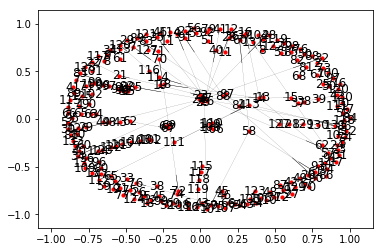

In [19]:
# グラフ作成、可視化
g = nx.DiGraph()
g.add_nodes_from(com_net)
g.add_edges_from(edges)

nx.draw_networkx(g, pos=nx.spring_layout(g), node_size=10, width=0.1)
#plt.figure(figsize=(10,10), dpi=200)
plt.savefig('network.png')
plt.show()